**Group 14 Implementation**

In [75]:
# Test error calculated below eth "Development of the Model Section"


# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso

# Importing Files
sample = pd.read_csv('ATM_sample.csv')
evaluation_set = pd.read_csv('ATM_test.csv')
sample.head()

,Shops,ATMs,Downtown,Weekday,Center,High,Withdraw
0,10.18,10,1,0,0,0,72.750556
1,9.74,10,1,1,0,0,66.720482
2,0.96,2,0,0,0,1,19.189516
3,9.58,9,1,1,0,1,67.388669
4,1.03,4,0,1,0,1,15.813127


Development of the Model

In [76]:
#OLS, Lasso, Ridge and Elastic Net Analysis

# Create new transformations
sample['ShopsSQ'] = sample['Shops']**2
sample['log_ATMs'] = np.log(sample['ATMs']+1)
evaluation_set['ShopsSQ'] = evaluation_set['Shops']**2
evaluation_set['log_ATMs'] = np.log(evaluation_set['ATMs']+1)
print(sample.head())

# Split 80:20 into training and test sets
num_entries = len(sample)
test_train_split = round(num_entries*0.8)
train = sample.iloc[0:test_train_split, :].copy()
test = sample.iloc[test_train_split:, :].copy()

   Shops  ATMs  Downtown  Weekday  Center  High   Withdraw   ShopsSQ  log_ATMs
0  10.18    10         1        0       0     0  72.750556  103.6324  2.397895
1   9.74    10         1        1       0     0  66.720482   94.8676  2.397895
2   0.96     2         0        0       0     1  19.189516    0.9216  1.098612
3   9.58     9         1        1       0     1  67.388669   91.7764  2.302585
4   1.03     4         0        1       0     1  15.813127    1.0609  1.609438


In [85]:
# Standardise the predictors

response = ['Withdraw']
predictors = [x for x in list(sample.columns) if x not in response] # the list all predictors
print(predictors)
print("\n")

mu = train[predictors].mean() # mean for each feature
sigma = train[predictors].std() # std for each feature
train[predictors] = (train[predictors] - mu) / sigma
test[predictors] = (test[predictors] - mu) / sigma
evaluation_set[predictors] = (evaluation_set[predictors] - mu) / sigma

print(train[predictors].mean())
print(train[predictors].std())
print(evaluation_set[predictors].mean())
print(evaluation_set[predictors].std())

print("\n")

['Shops', 'ATMs', 'Downtown', 'Weekday', 'Center', 'High', 'ShopsSQ', 'log_ATMs']


Shops      -1.009294e-17
ATMs       -5.934647e-17
Downtown   -8.074349e-18
Weekday     6.863197e-17
Center     -2.260818e-17
High        3.108624e-17
ShopsSQ    -1.513940e-17
log_ATMs    6.378736e-17
dtype: float64
Shops       1.0
ATMs        1.0
Downtown    1.0
Weekday     1.0
Center      1.0
High        1.0
ShopsSQ     1.0
log_ATMs    1.0
dtype: float64
Shops      -0.019110
ATMs       -0.104597
Downtown   -0.014547
Weekday     0.148902
Center      0.057495
High        0.038097
ShopsSQ    -0.022212
log_ATMs   -0.107514
dtype: float64
Shops       1.007276
ATMs        0.989953
Downtown    1.009566
Weekday     0.918414
Center      1.074698
High        1.018908
ShopsSQ     1.005009
log_ATMs    1.070698
dtype: float64




In [78]:
# OLS

formula1 = 'Withdraw ~ Shops + ATMs + Downtown + Weekday + Center + High + ShopsSQ + log_ATMs'

OLS1 = smf.ols(formula1, train)
OLS1 = OLS1.fit()
OLS1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Withdraw   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 2.235e+05
Date:                Sun, 12 Nov 2023   Prob (F-statistic):               0.00
Time:                        09:39:56   Log-Likelihood:                -40959.
No. Observations:               17600   AIC:                         8.194e+04
Df Residuals:                   17591   BIC:                         8.201e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     54.5458      0.019   2917.072      0.000      54.509      54.582
Shops          5.3619      3.116      1.721      0.085      -0.745      11.469
ATMs          -3.7536      0.084    -44.538      0.000      -3.919      -3.588
Downtown       0.4461      1.419      0.314      0.753      -2.335       3.227
Weekday       -1.5765      0.019    -84.271      0.000      -1.613      -1.540
Center         2.1683      0.019    115.941      0.000       2.132       2.205
High           0.4415      0.019     23.605      0.000       0.405       0.478
ShopsSQ       22.2365      1.740     12.780      0.000      18.826      25.647
log_ATMs       0.0605      0.095      0.634      0.526      -0.127       0.248
==============================================================================
Omnibus:                    14513.397   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           405614.051
Skew:                           3.887   Prob(JB):                         0.00
Kurtosis:                      25.196   Cond. No.                         444.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
# Lasso

lasso_cv = LassoCV(cv = 5)
lasso_cv.fit(train[predictors], np.ravel(train[response])) # the np.ravel is a necessary detail for compatibility
print(f'LASSO Lambda: {lasso_cv.alpha_}')
lasso = Lasso(alpha = lasso_cv.alpha_)
lasso.fit(train[predictors], np.ravel(train[response]))
print(f'Beta_0 = {lasso.predict([[0,0,0,0,0,0,0,0]])}')
pd.DataFrame(lasso.coef_.round(4),index = predictors).T

LASSO Lambda: 0.02478856640459449
Beta_0 = [54.54579691]


c:\Users\nicho\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.772e+03, tolerance: 1.111e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\nicho\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.772e+03, tolerance: 1.111e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\nicho\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


,Shops,ATMs,Downtown,Weekday,Center,High,ShopsSQ,log_ATMs
0,11.8395,-3.538,0.0,-1.5496,2.146,0.4198,16.0487,-0.0


In [80]:
# Ridge

alphas = np.exp(np.linspace(-20, 1, 500))
ridge_cv = RidgeCV(alphas = alphas, cv = 5)
ridge_cv.fit(train[predictors], np.ravel(train[response]))
print(f'Ridge Lambda: {ridge_cv.alpha_}')
ridge = Ridge(alpha = ridge_cv.alpha_)
ridge.fit(train[predictors], np.ravel(train[response]))
print(f'Beta_0 = {ridge.predict([[0,0,0,0,0,0,0,0]])}')
pd.DataFrame(ridge.coef_.round(4),index = predictors).T

Ridge Lambda: 0.014721638308430757
Beta_0 = [54.54579691]


c:\Users\nicho\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


,Shops,ATMs,Downtown,Weekday,Center,High,ShopsSQ,log_ATMs
0,5.5218,-3.7535,0.3777,-1.5765,2.1683,0.4415,22.1448,0.0604


In [81]:
# ElasticNet

enet_cv = ElasticNetCV(l1_ratio = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99], cv = 5)
enet_cv.fit(train[predictors],np.ravel(train[response]))
print(f'ENet Lambda: {enet_cv.alpha_}')
print(f'ENet Alpha: {enet_cv.l1_ratio_}')
enet = ElasticNet(alpha = enet_cv.alpha_, l1_ratio = enet_cv.l1_ratio_)
enet.fit(train[predictors], np.ravel(train[response]))
print(f'Beta_0 = {enet.predict([[0,0,0,0,0,0,0,0]])}')
pd.DataFrame(enet.coef_.round(4),index = predictors).T

ENet Lambda: 0.025038955964236862
ENet Alpha: 0.99
Beta_0 = [54.54579691]


c:\Users\nicho\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.183e+03, tolerance: 1.111e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\nicho\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.183e+03, tolerance: 1.111e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\nicho\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(


,Shops,ATMs,Downtown,Weekday,Center,High,ShopsSQ,log_ATMs
0,11.4209,-3.5215,0.0,-1.5493,2.1454,0.4196,16.4485,-0.0


In [82]:
# Validation with test data

columns = ['Test error']
rows = ['Lasso', 'Ridge', 'Elastic Net', 'OLS1']
results = pd.DataFrame(0.0, columns = columns, index = rows) # initialising a dataframe to hold the results

# Lasso
lassoPred = lasso.predict(test[predictors])
results.iloc[0] = np.sqrt(((test['Withdraw'] - lassoPred) ** 2).mean())

# Ridge
ridgePred = ridge.predict(test[predictors])
results.iloc[1] =  np.sqrt(((test['Withdraw'] - ridgePred) ** 2).mean())

# Elastic Net
enetPred = enet.predict(test[predictors])
results.iloc[2] = np.sqrt(((test['Withdraw'] - enetPred) ** 2).mean())

# OLS
OLS1Pred = OLS1.predict(test[predictors])
results.iloc[3] = np.sqrt(((test['Withdraw'] - OLS1Pred) ** 2).mean())

print(results)

             Test error
Lasso          2.532445
Ridge          2.522593
Elastic Net    2.532011
OLS1           2.522586


Test Error (For Marking)

In [87]:
ridgePred_evaluation = ridge.predict(evaluation_set[predictors])
test_error = ((evaluation_set['Withdraw'] - ridgePred_evaluation) ** 2).mean()
print(test_error)

7.304141045888304


Exploratory Data Analysis (EDA)

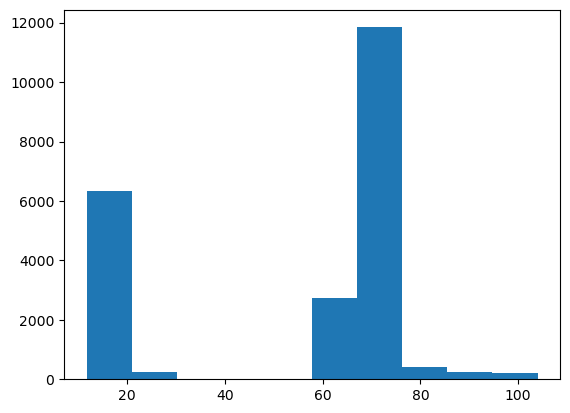

IndexError: index 6 is out of bounds for axis 0 with size 6

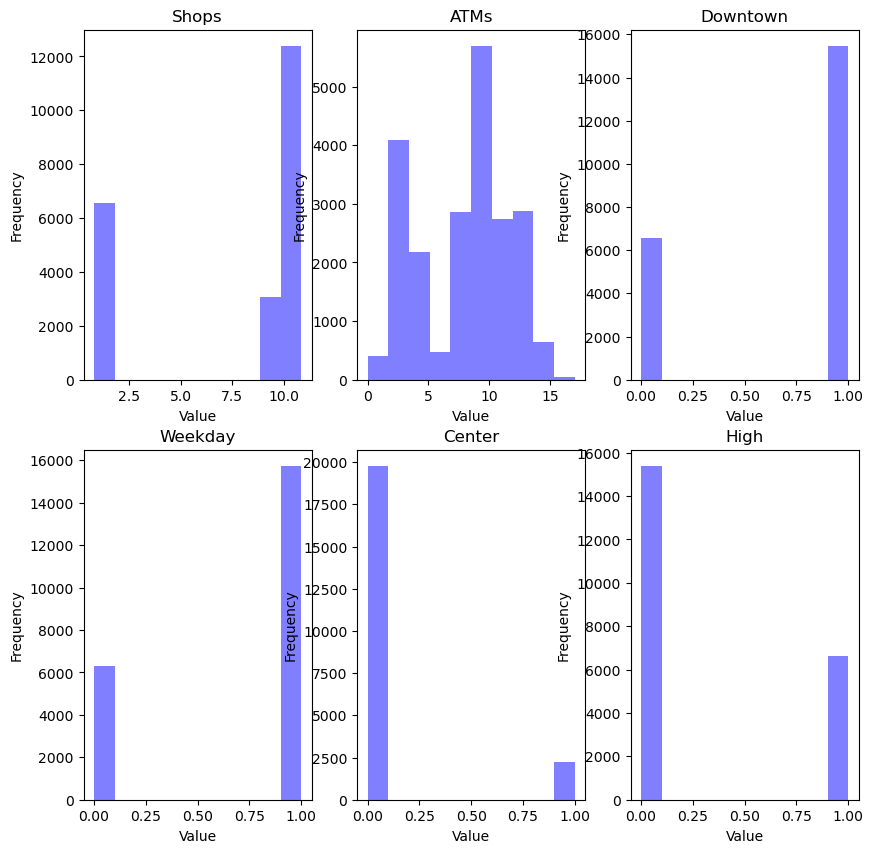

In [84]:
X = sample.drop("Withdraw", axis = 1)
y = sample["Withdraw"]
plt.hist(sample["Withdraw"])
plt.show()

n_rows = 2
n_cols = 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 10))
axes = axes.flatten()

for i, feature in enumerate(X.columns):
    ax = axes[i]
    ax.hist(sample[feature], bins=10, alpha=0.5, color='blue')
    ax.set_title(feature)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

corr_matrix = sample.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)

# Add title and display the plot
plt.title('Correlation Matrix')
plt.show()

sample.describe()

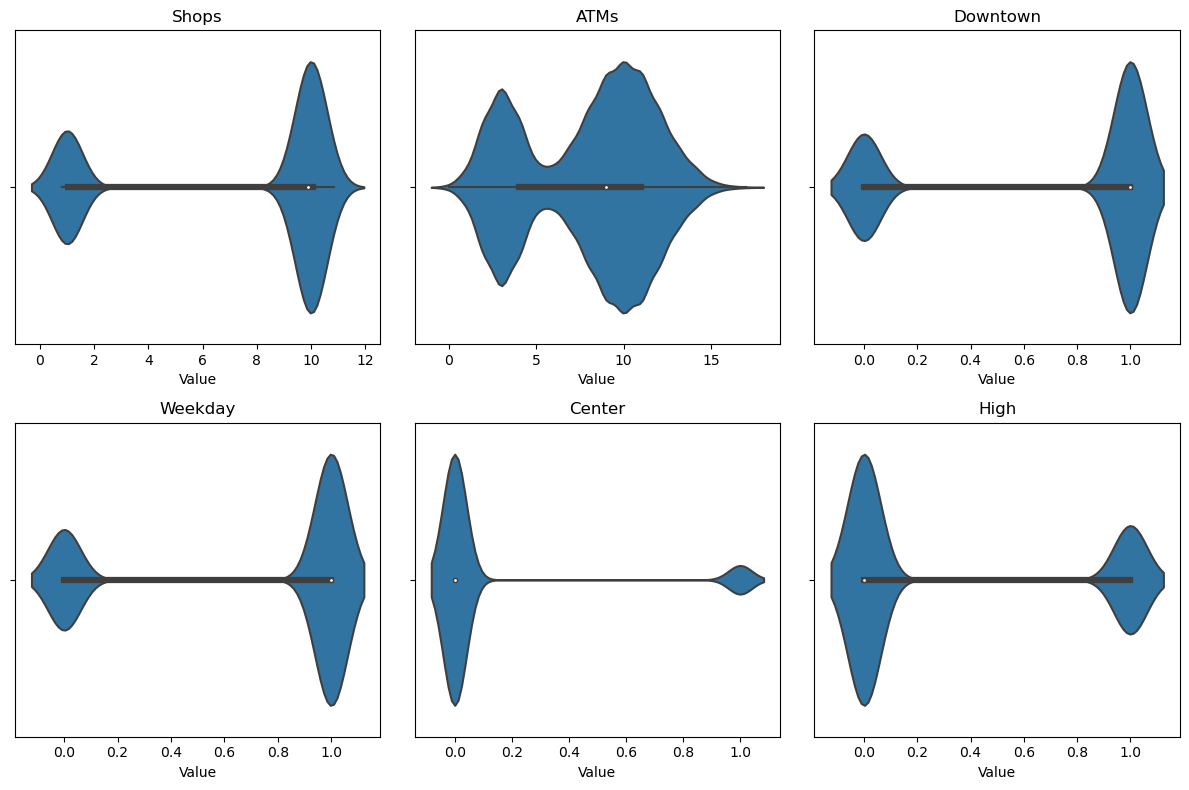

In [ ]:
n_rows = 2
n_cols = 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
axes = axes.flatten()

variables = list(X.columns) # Replace with your desired variables
for i, variable in enumerate(variables):
    # Select the current axis
    ax = axes[i]

    # Create the violin plot for the current variable
    sns.violinplot(x=variable, data=sample, ax=ax)

    # Set the title and labels
    ax.set_title(variable)
    ax.set_xlabel('Value')
    ax.set_ylabel('')

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

<Axes: >

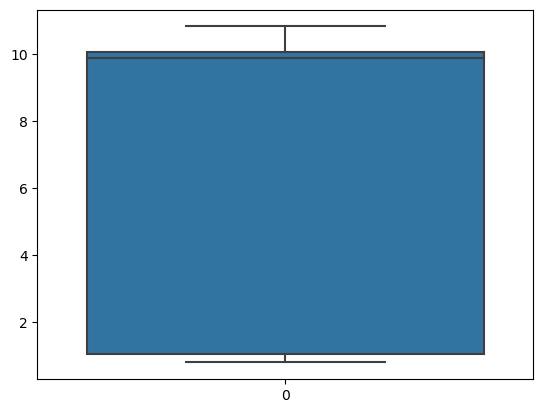

In [ ]:
sns.boxplot(sample["Shops"])

<Axes: >

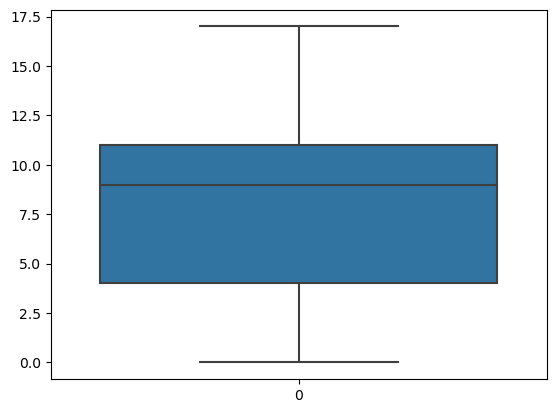

In [ ]:
sns.boxplot(sample["ATMs"])

<Axes: >

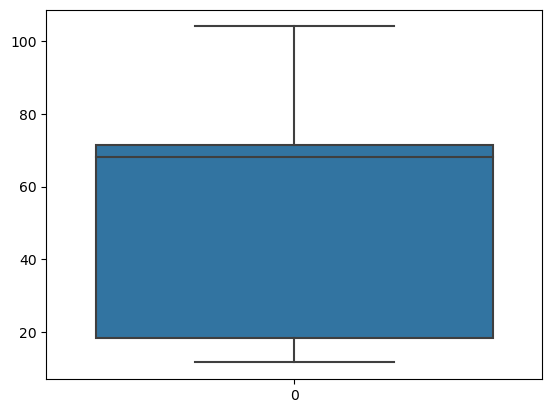

In [ ]:
sns.boxplot(sample["Withdraw"])

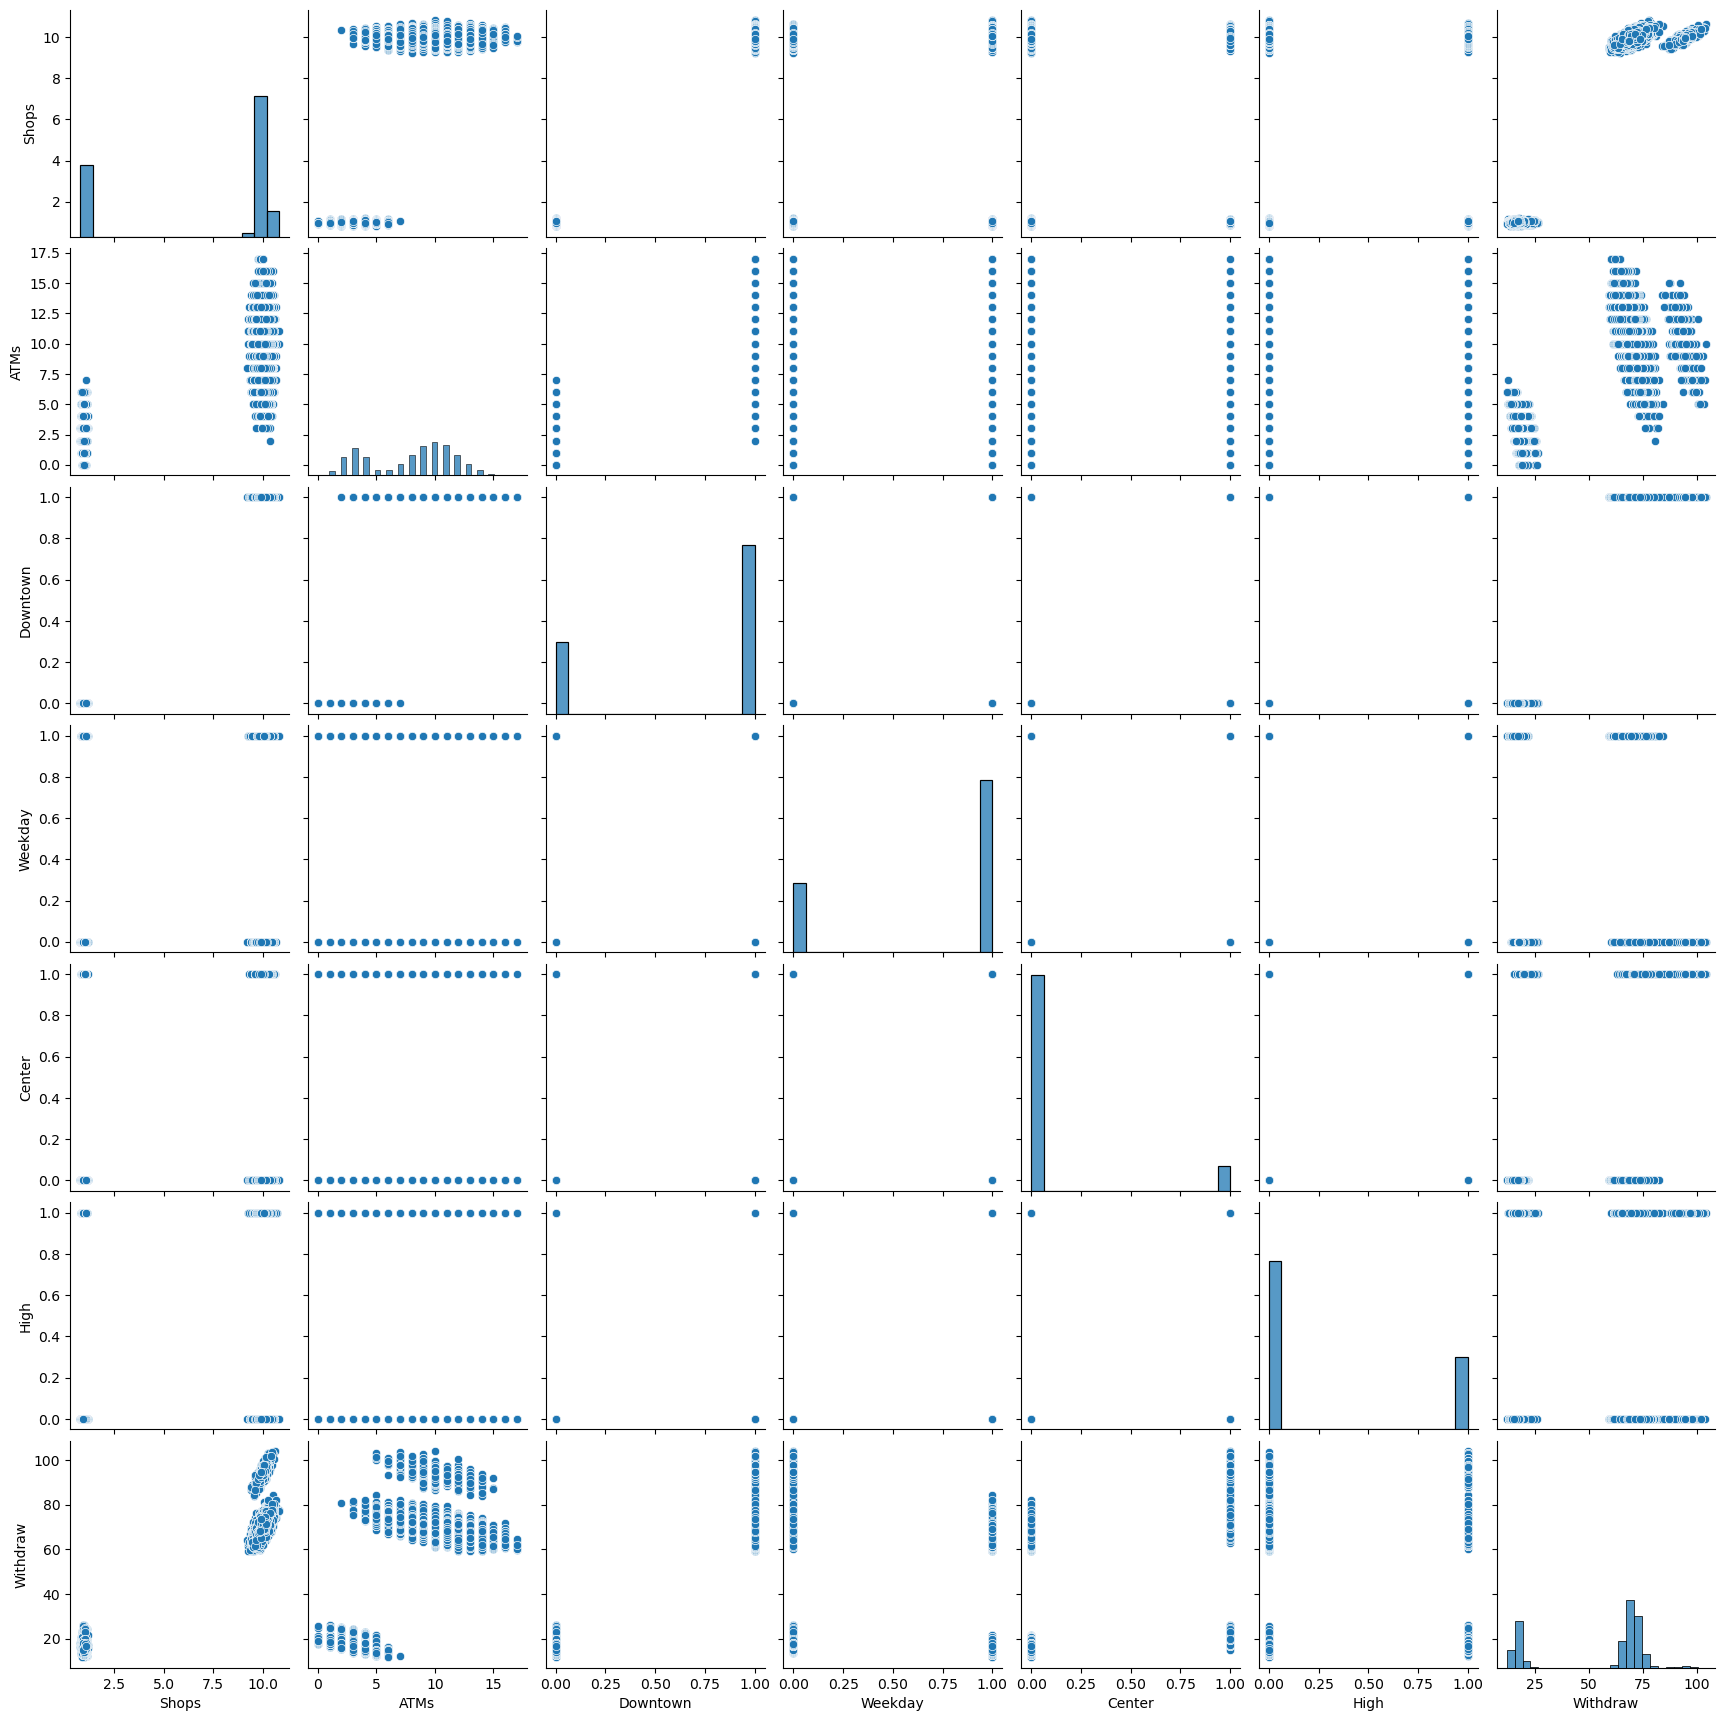

In [ ]:
sns.pairplot(sample)